# Matplotlib

- es una colección de funciones que permiten graficar
- está inspirada en MATLAB
- el módulo más importante dentro de matplotlib es pyplot
- pyplot permite:
    - crear figuras
    - crear areas de graficación dentro de la figura
    - "plotear" lineas en el area de graficación
    - decorar con etiquetas
    - etc

Populating the interactive namespace from numpy and matplotlib


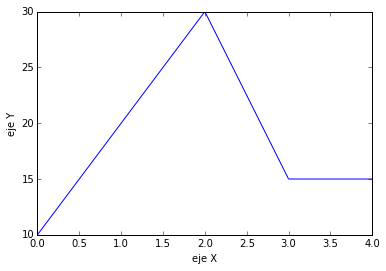

In [1]:
import matplotlib.pyplot as plt

# directiva para ipython, debe mostrar los gráficos en el notebook
%pylab inline   

plt.plot([10,20,30,15,15])
plt.xlabel('eje X')
plt.ylabel('eje Y')


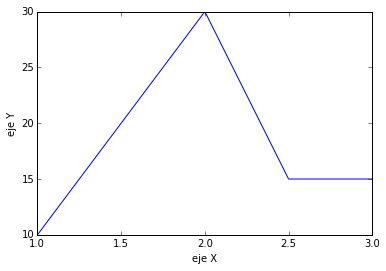

In [2]:
plt.plot([1, 1.5, 2, 2.5, 3], [10,20,30,15,15])
plt.xlabel('eje X')
plt.ylabel('eje Y');

[0, 4, 5, 35]

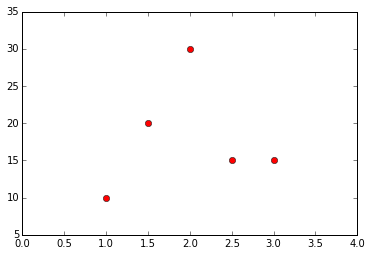

In [3]:
plt.plot([1, 1.5, 2, 2.5, 3], [10,20,30,15,15], 'ro')
plt.axis([0, 4, 5, 35])

# Registro de ejemplo

In [4]:
import pandas as pd
# pd.options.display.max_columns= 60
pd.options.display.max_rows= 6
pd.options.display.notebook_repr_html = True

# construcción del nombre del archivo a procesar
miDirectorio = './datos/'
nombreArchivo = 'registro1.txt'
archivoDatos = miDirectorio + nombreArchivo

registro = pd.read_csv(archivoDatos, sep='\t', names=['tiempo','voltaje'], decimal=',')

In [5]:
registro

,tiempo,voltaje
0,284.405,0.101
1,284.410,0.101
2,284.415,0.101
...,...,...
356,286.185,0.097
357,286.190,0.097
358,286.195,0.097


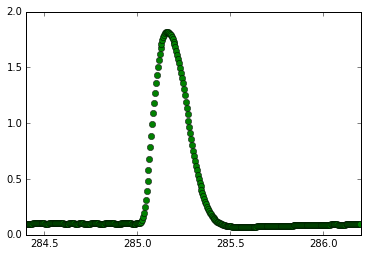

In [6]:
plt.plot(registro['tiempo'], registro['voltaje'], 'go');

# Eliminación del offset

In [7]:
offset = registro['voltaje'][0:100].mean()
registro['sin offset'] = registro['voltaje'] - offset
registro

,tiempo,voltaje,sin offset
0,284.405,0.101,-0.00106
1,284.410,0.101,-0.00106
2,284.415,0.101,-0.00106
...,...,...,...
356,286.185,0.097,-0.00506
357,286.190,0.097,-0.00506
358,286.195,0.097,-0.00506


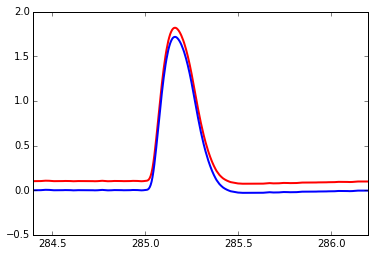

In [8]:
x = registro['tiempo']
y1 = registro['voltaje']
y2 = registro['sin offset']

plt.plot(x, y1, 'r', x, y2, 'b', linewidth=2.0)

# setp(): alternativa para controlar las propiedades de un gráfico

[None, None]

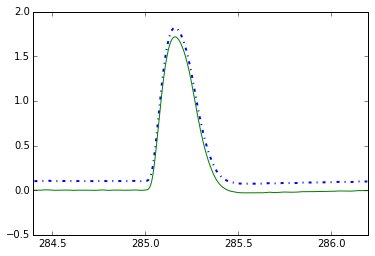

In [77]:
line1, line2 = plt.plot(x, y1, x, y2)
# use keyword args
plt.setp(line1, color='b', linewidth=2.0, linestyle='-.')
plt.setp(line2, color='g', linewidth=1.0)

# Figuras con dos gráficos

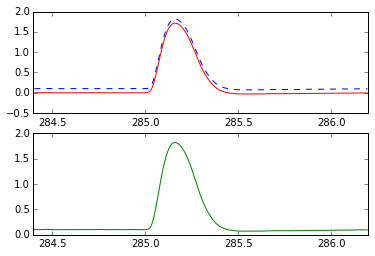

In [10]:
plt.figure(1)

plt.subplot(211)
plt.plot(x, y1, 'b--', x, y2, 'r')

plt.subplot(212)
plt.plot(x, y1, 'g');

# Tamaño (figure)

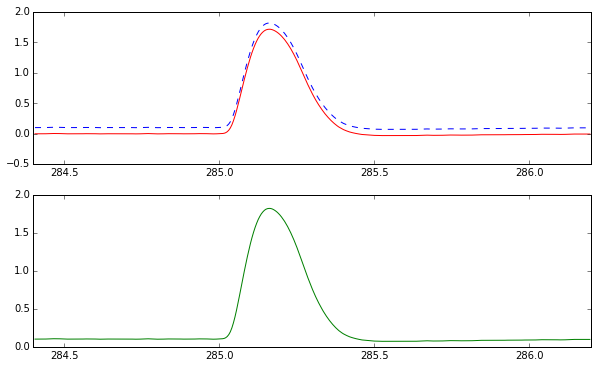

In [26]:
plt.figure(num=1, figsize=(10, 6), dpi=200)

plt.subplot(211)
plt.plot(x, y1, 'b--', x, y2, 'r')

plt.subplot(212)
plt.plot(x, y1, 'g');

# Más gráficos

In [31]:
def mostrar4figuras(x, y1, y2):
    plt.figure(1, figsize=(10, 6), dpi=200)
    plt.subplot(221)
    plt.plot(x, y1, 'b--', x, y2, 'b')
    plt.subplot(222)
    plt.plot(x, y1, 'g')
    plt.title('Puedo graficar en verde!')
    plt.subplot(223)
    plt.plot(x, -y1, 'r--', x, y2**3, 'r')
    plt.subplot(224)
    plt.plot(x, -y2, 'y');

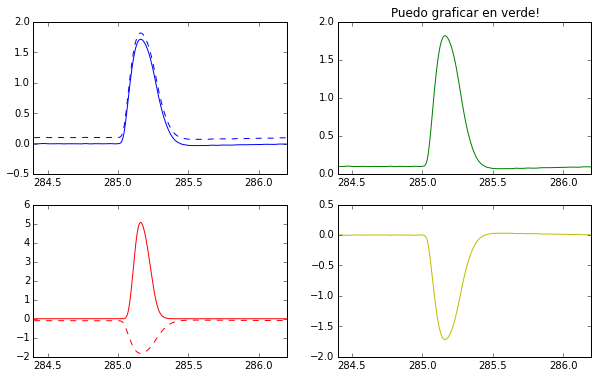

In [32]:
mostrar4figuras(x, y1, y2)

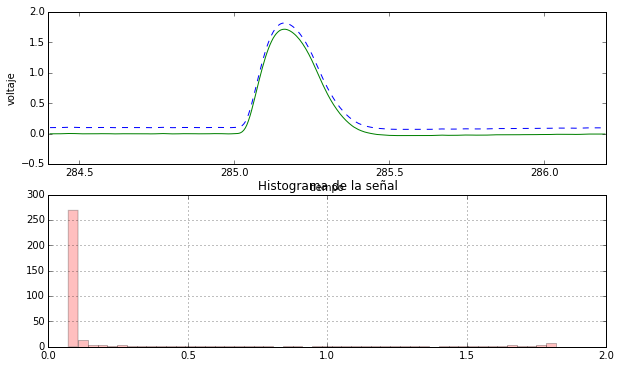

In [33]:
plt.figure(num=1, figsize=(10, 6), dpi=200)

plt.subplot(211)
plt.plot(x, y1, 'b--', x, y2, 'g')
plt.xlabel('tiempo')
plt.ylabel('voltaje')
plt.subplot(212)
plt.grid(True)
plt.title('Histograma de la señal')
plt.hist(y1, 50, facecolor='r', alpha=0.25);

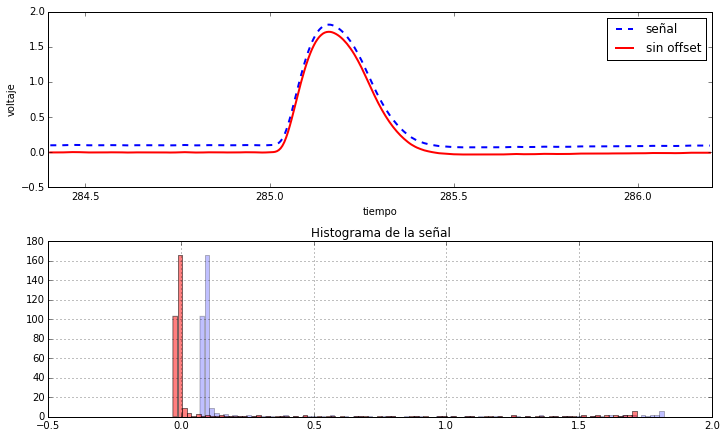

In [82]:
plt.figure(num=1, figsize=(10, 6), dpi=200)

plt.subplot(211)
etiquetas = ['señal', 'sin offset']
plt.plot(x, y1, 'b--', x, y2, 'r', linewidth=2.0)
plt.xlabel('tiempo'), plt.ylabel('voltaje')
plt.legend(etiquetas)

plt.subplot(212)
plt.grid(True)
plt.title('Histograma de la señal')
plt.hist(y1, 100, facecolor='b', alpha=0.25)
plt.hist(y2, 100, facecolor='r', alpha=0.5)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Otro ejemplo: ecuación de Nernst

In [35]:
def potNernst(Out, In, T=298, z=1):
    '''Potencial de equilibrio de un ion. 
    T: temperatura en Kelvin
    z: valencia del ion
    Out: concentración fuera de la célula
    In: concentración dentro de la célula
    '''
    
    R = 8.314  # constante universal de los gases
    F = 96480  # constante de Faraday
    Eion = (R * T) / (z * F) * math.log(Out/In)
    return Eion

# Mezcla: lista + numpy array

In [37]:
import numpy as np

concIn = 1

concentraciones = np.linspace(0.01, 10, 1000)
nernst = [potNernst(concOut, concIn) for concOut in concentraciones]

type(concentraciones), type(nernst)

(numpy.ndarray, list)

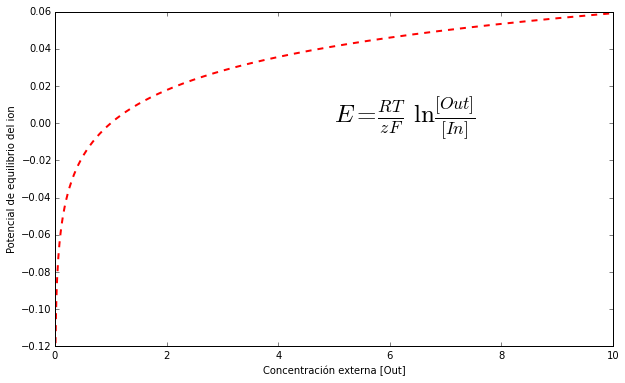

In [64]:
plt.figure(num=1, figsize=(10, 6), dpi=200)
plt.plot(concentraciones, nernst, 'r--', linewidth=2.0)
plt.xlabel('Concentración externa [Out]')
plt.ylabel('Potencial de equilibrio del ion')
plt.annotate(r'$ E = \frac{RT}{zF} \, \ln \frac{[Out]}{[In]} $', xy=(5, 0), size=25);